# --- Day 5: Hydrothermal Venture ---
You come across a field of hydrothermal vents on the ocean floor! These vents constantly produce large, opaque clouds, so it would be best to avoid them if possible.

They tend to form in lines; the submarine helpfully produces a list of nearby lines of vents (your puzzle input) for you to review. For example:
```
0,9 -> 5,9
8,0 -> 0,8
9,4 -> 3,4
2,2 -> 2,1
7,0 -> 7,4
6,4 -> 2,0
0,9 -> 2,9
3,4 -> 1,4
0,0 -> 8,8
5,5 -> 8,2
```
Each line of vents is given as a line segment in the format x1,y1 -> x2,y2 where x1,y1 are the coordinates of one end the line segment and x2,y2 are the coordinates of the other end. These line segments include the points at both ends. In other words:

An entry like 1,1 -> 1,3 covers points 1,1, 1,2, and 1,3.
An entry like 9,7 -> 7,7 covers points 9,7, 8,7, and 7,7.
For now, only consider horizontal and vertical lines: lines where either x1 = x2 or y1 = y2.

So, the horizontal and vertical lines from the above list would produce the following diagram:
```
.......1..
..1....1..
..1....1..
.......1..
.112111211
..........
..........
..........
..........
222111....
```
In this diagram, the top left corner is 0,0 and the bottom right corner is 9,9. Each position is shown as the number of lines which cover that point or . if no line covers that point. The top-left pair of 1s, for example, comes from 2,2 -> 2,1; the very bottom row is formed by the overlapping lines 0,9 -> 5,9 and 0,9 -> 2,9.

To avoid the most dangerous areas, you need to determine the number of points where at least two lines overlap. In the above example, this is anywhere in the diagram with a 2 or larger - a total of 5 points.

Consider only horizontal and vertical lines. **At how many points do at least two lines overlap**?

In [1]:
import os
import numpy as np

In [2]:
filename = "data/day05a.txt"

num_lines = sum(1 for line in open(filename))

In [3]:
vent_lines = []
vlarr = np.empty((num_lines, 2, 2), dtype=int)
i = 0
with open(filename, "r") as ff:
    for line in ff:
        start_str, _, stop_str = line.split()
        start = [int(s) for s in start_str.split(',')]
        stop = [int(s) for s in stop_str.split(',')]
        vent_lines.append(start + stop)
        vlarr[i][0] = np.array(start)
        vlarr[i][1] = np.array(stop)
        i += 1

# Construct the reduced arrary, containing only the lines where there is no changement in x or in y
reduced_vlarr = vlarr[np.where(np.diff(vlarr, axis=1)==0)[0]]

carto = np.zeros((int(np.max(reduced_vlarr[:,:,1])+1), int(np.max(reduced_vlarr[:,:,0])+1)), dtype=int)

for i, rv in enumerate(reduced_vlarr):
    x1, x2 = np.sort(rv[:, 0])
    y1, y2 = np.sort(rv[:, 1])
    # print(x1, x2, y1, y2)
    if x1 != x2:
        carto[x1:x2+1, y1] += 1
    elif y1 != y2:
        carto[x1, y1:y2+1] += 1

np.count_nonzero(carto > 1)

6564

## part 2

In [4]:
filename = "data/day05a.txt"

num_lines = sum(1 for line in open(filename))

In [5]:
vlarr = np.empty((num_lines, 2, 2), dtype=int)
i=0
with open(filename, "r") as ff:
    for line in ff:
        # print(line)
        start_str, _, stop_str = line.split()
        start = [int(s) for s in start_str.split(',')]
        stop = [int(s) for s in stop_str.split(',')]
        # print(start, stop)
        vlarr[i][0] = np.array(start)
        vlarr[i][1] = np.array(stop)
        i+=1

In [6]:
size_x = int(np.max(vlarr))
carto = np.zeros((size_x+1, size_x+1), dtype=int)
# def draw_lines(line_coords, carto):

def draw_line(in_iter):
    x1, y1, x2, y2 = np.array(in_iter)
    # print("\n",(x1, y1), (x2, y2))
    i=0
    conditions = {"horizontal_lr" : ((x1 < x2) & (y1 == y2)),
                  "horizontal_rl" : ((x1 > x2) & (y1 == y2)),
                  "vertical_ud" : (x1 == x2) & (y1 < y2),
                  "vertical_du" : (x1 == x2) & (y1 > y2),
                  "diagonal_tblr" : ((x1 < x2) & (y1 < y2)) & (x2-x1 == y2-y1),
                  "diagonal_tbrl" : ((x1 > x2) & (y1 < y2)) & (x1-x2 == y2-y1),
                  "diagonal_btlr" : ((x1 < x2) & (y1 > y2)) & (x2-x1 == y1-y2),
                  "diagonal_btrl" : ((x1 > x2) & (y1 > y2)) & (x1-x2 == y1-y2)}
    
    indices = {"horizontal_lr" : [[x1+i, y1] for i in range(x2-x1+1)], # 0
               "horizontal_rl" : [[x1-i, y1] for i in range(x1-x2+1)], # 1
               "vertical_ud" : [[x1, y1+i] for i in range(y2-y1+1)], # 2
               "vertical_du" : [[x1, y1-i] for i in range(y1-y2+1)], # 3 (2, 2) (2, 1)
               "diagonal_tblr" : [[x1+i, y1+i] for i in range(x2-x1+1)], # 4
               "diagonal_tbrl" : [[x1-i, y1+i] for i in range(x1-x2+1)], # 5
               "diagonal_btlr" : [[x1+i, y1-i] for i in range(x2-x1+1)],
               "diagonal_btrl" : [[x1-i, y1-i] for i in range(x1-x2+1)]}

    for case, cond in conditions.items():
        # print("Condition ", i, " is ", cond)
        i+=1
        if cond:
            # print(indices[case])
            return indices.get(case, "kako su tvoji?")


for rv in vlarr:
    ind = draw_line(rv.ravel())
    if ind:
        for iii in ind:
            # print(iii)
            carto[tuple(iii)] += 1
        # print(carto.T)
        

np.count_nonzero(carto > 1)

19172

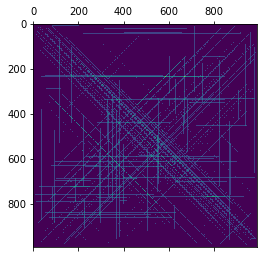

In [7]:
import matplotlib.pyplot as plt

plt.matshow(carto.T);